# Variational Gaussian Model

In [1]:
import math
import torch

import matplotlib.pyplot as plt

from ptvi import (UnivariateGaussian, NullStoppingHeuristic, 
                  ExponentialStoppingHeuristic)

stop_heur = NullStoppingHeuristic()
max_iter = 2**13

Simulate data, which will be common for all models. Mean and sd are shown below.

In [2]:
torch.manual_seed(123)
N, μ0, σ0 = 100, 5., 5.
η0 = math.log(σ0)
y = UnivariateGaussian().simulate(N=N, μ0=μ0, σ0=σ0)

Simulated 100 observations with mean = 4.76, sd = 5.00


## Analytic entropy term

In [3]:
model = UnivariateGaussian(n_draws=1, stochastic_entropy=False,
                           stop_heur=stop_heur)
result = model.training_loop(y, max_iters=max_iter)

Gaussian model:
    - analytic entropy;
    - 1 simulation draw;
    - Null stopping heuristic (never fires)

RMSprop optimizer with param groups:
    group 0. lr=0.01, momentum=0, alpha=0.99, eps=1e-08, centered=False, weight_decay=0

Displayed loss is smoothed with λ=0.1
       0. smoothed loss =  -274842.09  μ_hat = 0.10 (1.10), η_hat = 0.10 (0.91) 
       1. smoothed loss =   244635.77  μ_hat = 0.10 (1.11), η_hat = 0.10 (0.91) 
       2. smoothed loss =  -220232.31  μ_hat = 0.10 (1.11), η_hat = 0.10 (0.91) 
       4. smoothed loss =  -179307.77  μ_hat = 0.10 (1.11), η_hat = 0.10 (0.91) 
       8. smoothed loss =  -118476.89  μ_hat = 0.10 (1.10), η_hat = 0.10 (0.91) 
      16. smoothed loss =   -52359.69  μ_hat = 0.10 (1.09), η_hat = 0.10 (0.90) 
      32. smoothed loss =    -8708.24  μ_hat = 0.11 (1.09), η_hat = 0.11 (0.90) 
      64. smoothed loss =     -928.99  μ_hat = 0.11 (1.09), η_hat = 0.11 (0.90) 
     128. smoothed loss =      748.68  μ_hat = 0.16 (0.98), η_hat = 0.16 (0.87

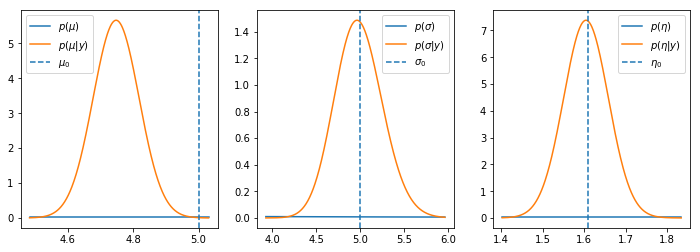

In [4]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(131); result.plot_marg('μ', true_val=μ0)
plt.subplot(132); result.plot_marg('σ', true_val=σ0)
plt.subplot(133); result.plot_marg('η', true_val=η0)

## Stochastic entropy term

### elbo estimated with 1 draw

In [5]:
model_s1 = UnivariateGaussian(n_draws=1, stochastic_entropy=True,
                           stop_heur=stop_heur)
result_s1 = model_s1.training_loop(y, max_iters=max_iter)

Gaussian model:
    - stochastic entropy;
    - 1 simulation draw;
    - Null stopping heuristic (never fires)

RMSprop optimizer with param groups:
    group 0. lr=0.01, momentum=0, alpha=0.99, eps=1e-08, centered=False, weight_decay=0

Displayed loss is smoothed with λ=0.1
       0. smoothed loss =  -225808.22  μ_hat = 0.10 (1.10), η_hat = 0.10 (1.10) 
       1. smoothed loss =   203192.20  μ_hat = 0.11 (1.03), η_hat = 0.10 (1.11) 
       2. smoothed loss =  -195075.25  μ_hat = 0.21 (1.13), η_hat = 0.20 (1.02) 
       4. smoothed loss =  -156889.67  μ_hat = 0.23 (1.12), η_hat = 0.22 (1.01) 
       8. smoothed loss =  -102913.52  μ_hat = 0.23 (1.12), η_hat = 0.22 (1.02) 
      16. smoothed loss =   -31035.27  μ_hat = 0.33 (1.01), η_hat = 0.32 (0.90) 
      32. smoothed loss =    -9033.26  μ_hat = 0.36 (1.01), η_hat = 0.35 (0.88) 
      64. smoothed loss =     5784.41  μ_hat = 0.46 (0.94), η_hat = 0.44 (0.80) 
     128. smoothed loss =    -1289.33  μ_hat = 0.55 (0.94), η_hat = 0.53 (0.

### elbo estimated with 10 draws

In [6]:
model_s10 = UnivariateGaussian(n_draws=10, stochastic_entropy=True,
                           stop_heur=stop_heur)
result_s10 = model_s10.training_loop(y, max_iters=max_iter)

Gaussian model:
    - stochastic entropy;
    - 10 simulation draws;
    - Null stopping heuristic (never fires)

RMSprop optimizer with param groups:
    group 0. lr=0.01, momentum=0, alpha=0.99, eps=1e-08, centered=False, weight_decay=0

Displayed loss is smoothed with λ=0.1
       0. smoothed loss =    -2918.21  μ_hat = 0.10 (1.10), η_hat = 0.10 (0.91) 
       1. smoothed loss =     -101.33  μ_hat = 0.19 (1.01), η_hat = 0.19 (0.80) 
       2. smoothed loss =      -75.79  μ_hat = 0.20 (1.09), η_hat = 0.20 (0.81) 
       4. smoothed loss =       78.86  μ_hat = 0.21 (0.94), η_hat = 0.21 (0.80) 
       8. smoothed loss =     -329.01  μ_hat = 0.31 (0.86), η_hat = 0.31 (0.74) 
      16. smoothed loss =     -112.41  μ_hat = 0.38 (0.90), η_hat = 0.38 (0.69) 
      32. smoothed loss =      849.26  μ_hat = 0.50 (0.87), η_hat = 0.50 (0.59) 
      64. smoothed loss =     -205.22  μ_hat = 0.63 (0.86), η_hat = 0.62 (0.53) 
     128. smoothed loss =      -99.81  μ_hat = 0.81 (0.84), η_hat = 0.81 (

### elbo estimated with 100 draws

In [ ]:
model_s100 = UnivariateGaussian(n_draws=100, stochastic_entropy=True,
                           stop_heur=stop_heur)
result_s100 = model_s100.training_loop(y, max_iters=max_iter)

Gaussian model:
    - stochastic entropy;
    - 100 simulation draws;
    - Null stopping heuristic (never fires)

RMSprop optimizer with param groups:
    group 0. lr=0.01, momentum=0, alpha=0.99, eps=1e-08, centered=False, weight_decay=0

Displayed loss is smoothed with λ=0.1
       0. smoothed loss =   -21054.07  μ_hat = 0.10 (0.90), η_hat = 0.10 (0.91) 
       1. smoothed loss =    18379.62  μ_hat = 0.12 (0.89), η_hat = 0.12 (0.89) 
       2. smoothed loss =   -17345.70  μ_hat = 0.15 (0.96), η_hat = 0.15 (0.86) 
       4. smoothed loss =   -14137.12  μ_hat = 0.20 (0.92), η_hat = 0.20 (0.82) 
       8. smoothed loss =    -9292.29  μ_hat = 0.27 (0.91), η_hat = 0.27 (0.76) 
      16. smoothed loss =    -3696.43  μ_hat = 0.37 (0.94), η_hat = 0.37 (0.66) 
      32. smoothed loss =     -713.28  μ_hat = 0.48 (0.88), η_hat = 0.48 (0.59) 
      64. smoothed loss =      -68.43  μ_hat = 0.64 (0.86), η_hat = 0.63 (0.49) 
     128. smoothed loss =      -30.17  μ_hat = 0.84 (0.82), η_hat = 0.82 

In [ ]:
result_s1.plot_marg('μ', suffix='^{(1)}', true_val=μ0)
result_s10.plot_marg('μ', suffix='^{(10)}', true_val=μ0)
result_s100.plot_marg('μ', suffix='^{(100)}', true_val=μ0)

In [ ]:
result_s1.plot_marg('σ', suffix='^{(1)}', true_val=σ0)
result_s10.plot_marg('σ', suffix='^{(10)}', true_val=σ0)
result_s100.plot_marg('σ', suffix='^{(100)}', true_val=σ0)

In [ ]:
result_s1.plot_marg('η', suffix='^{(1)}', true_val=η0)
result_s10.plot_marg('η', suffix='^{(10)}', true_val=η0)
result_s100.plot_marg('η', suffix='^{(100)}', true_val=η0)